<a href="https://colab.research.google.com/github/VishakBharadwaj94/Cheetah_vs_Leopard/blob/master/CheetahVLeopard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from fastai.vision import *

In [0]:
file = 'leopard.csv'
folder = 'leopards'

In [0]:
file = 'cheetah.csv'
folder = 'cheetahs'

In [0]:
path = Path('data')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
download_images(path/file,dest)

In [0]:
classes = ['leopards','cheetahs']
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

In [0]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

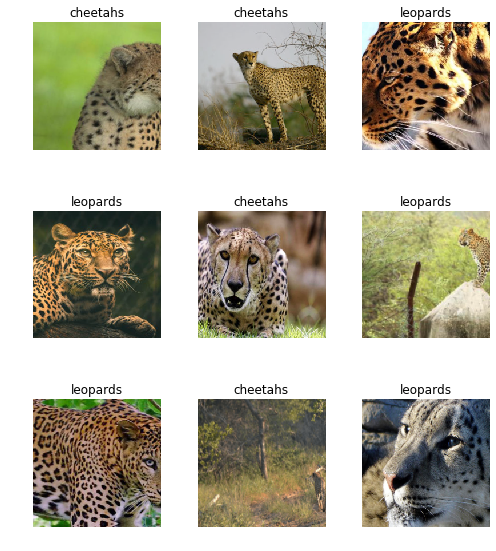

In [13]:
data.show_batch(rows=3, figsize=(7,8))

In [14]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['cheetahs', 'leopards'], 2, 1151, 287)

In [16]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:04<00:00, 21373051.86it/s]


In [17]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.388364,0.164979,0.958188,00:37
1,0.272355,0.170753,0.944251,00:25
2,0.203050,0.129979,0.961672,00:25
3,0.160942,0.126940,0.961672,00:25


In [18]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


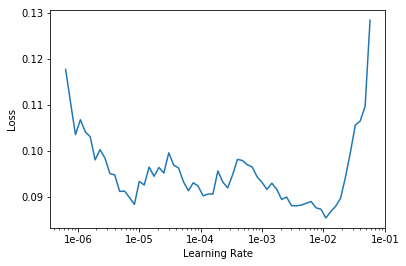

In [19]:
learn.recorder.plot()

In [0]:
learn.save('stage-1')

In [22]:
learn.load('stage-1')
learn.unfreeze()
learn.fit_one_cycle(2,max_lr=slice(1e-6,1e-5),wd=0.1)
#improvement in accuracy

epoch,train_loss,valid_loss,accuracy,time
0,0.108369,0.125031,0.954704,00:31
1,0.094825,0.121553,0.965157,00:31


In [0]:
learn.save('stage-2')

In [24]:
learn.unfreeze()
learn.fit_one_cycle(2,max_lr=slice(1e-6,1e-5),wd=0.1)
#improvement in accuracy

epoch,train_loss,valid_loss,accuracy,time
0,0.094682,0.118778,0.961672,00:31
1,0.078252,0.120316,0.961672,00:31


In [30]:
learn.unfreeze()
learn.fit_one_cycle(2,max_lr=slice(1e-5,1e-4),wd=0.1)
#improvement in accuracy

epoch,train_loss,valid_loss,accuracy,time
0,0.071943,0.118089,0.975610,00:32
1,0.059113,0.132001,0.968641,00:31


In [0]:
learn.save('stage-3')

In [34]:
learn.load('stage-3')
learn.fit_one_cycle(2,max_lr=slice(1e-5,1e-4),wd=0.1)
#reduction in accuracy

epoch,train_loss,valid_loss,accuracy,time
0,0.049305,0.144096,0.958188,00:32
1,0.038905,0.138517,0.965157,00:31


The final model is a resnet50 that can classify cheetahs and leopards with 96.51% accuracy.